/home/riccardo/anaconda3/envs/py39_tf211/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
req         WARNING 	DEFAULT CACHE ENABLED! (413.37 MB) /home/riccardo/.cache/fastf1
core           INFO 	Loading data for British Grand Prix - Qualifying [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using

         Track  Total Distance  Number of Corners  Average Angle  \
0  Silverstone    54684.311071                 18      -4.988784   
1        Monza    30135.622972                 11      51.361521   
2          Spa    36311.058036                 14    -206.491919   

   Average Corner Length  
0            3038.017282  
1            2739.602088  
2            2593.647003  


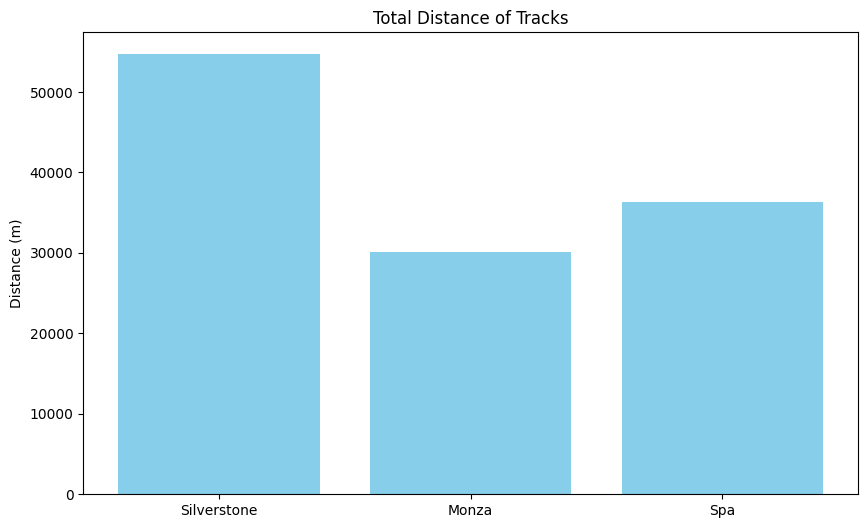

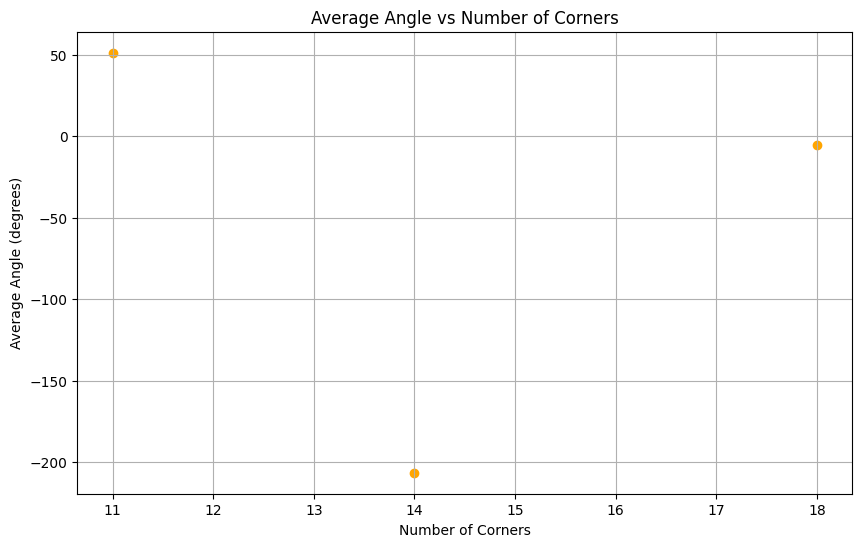

In [3]:
import numpy as np
import pandas as pd
import fastf1
import matplotlib.pyplot as plt

# Example track data structure
tracks_data = {
    "Track": [],
    "Total Distance": [],
    "Number of Corners": [],
    "Average Angle": [],
    "Average Corner Length": []
}

# Load track data (this is a placeholder; load actual data for multiple tracks)
track_names = ['Silverstone', 'Monza', 'Spa']  # Add more tracks as needed

for track_name in track_names:
    session = fastf1.get_session(2023, track_name, 'Q')
    session.load()
    
    lap = session.laps.pick_fastest()
    pos = lap.get_pos_data()
    circuit_info = session.get_circuit_info()
    
    # Calculate features
    total_distance = circuit_info.corners['Distance'].sum()
    num_corners = circuit_info.corners.shape[0]
    avg_angle = circuit_info.corners['Angle'].mean()
    avg_corner_length = circuit_info.corners['Distance'].mean()
    
    # Append data to the dictionary
    tracks_data["Track"].append(track_name)
    tracks_data["Total Distance"].append(total_distance)
    tracks_data["Number of Corners"].append(num_corners)
    tracks_data["Average Angle"].append(avg_angle)
    tracks_data["Average Corner Length"].append(avg_corner_length)

# Convert to DataFrame
tracks_df = pd.DataFrame(tracks_data)

# Display the DataFrame
print(tracks_df)

# Categorize tracks based on average angle
def categorize_track(row):
    if row['Average Angle'] < 45:
        return 'Fast'
    elif 45 <= row['Average Angle'] < 90:
        return 'Medium'
    else:
        return 'Technical'

tracks_df['Category'] = tracks_df.apply(categorize_track, axis=1)

# Visualize the data
plt.figure(figsize=(10, 6))
plt.bar(tracks_df['Track'], tracks_df['Total Distance'], color='skyblue')
plt.title('Total Distance of Tracks')
plt.ylabel('Distance (m)')
plt.show()

# Example of scatter plot for average angle vs number of corners
plt.figure(figsize=(10, 6))
plt.scatter(tracks_df['Number of Corners'], tracks_df['Average Angle'], color='orange')
plt.title('Average Angle vs Number of Corners')
plt.xlabel('Number of Corners')
plt.ylabel('Average Angle (degrees)')
plt.grid(True)
plt.show()


core           INFO 	Loading data for British Grand Prix - Qualifying [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '81', '16', '55', '63', '44', '23', '14', '10', '27', '18', '31', '2', '77', '11', '22', '24', '21', '20']
core           INFO 	Loading data for Italian Grand Prix - Qualifying [v3.4.1]
req            INFO 	Using ca

         Track  Number of Turns
0  Silverstone                0
1        Monza                0
2          Spa                0


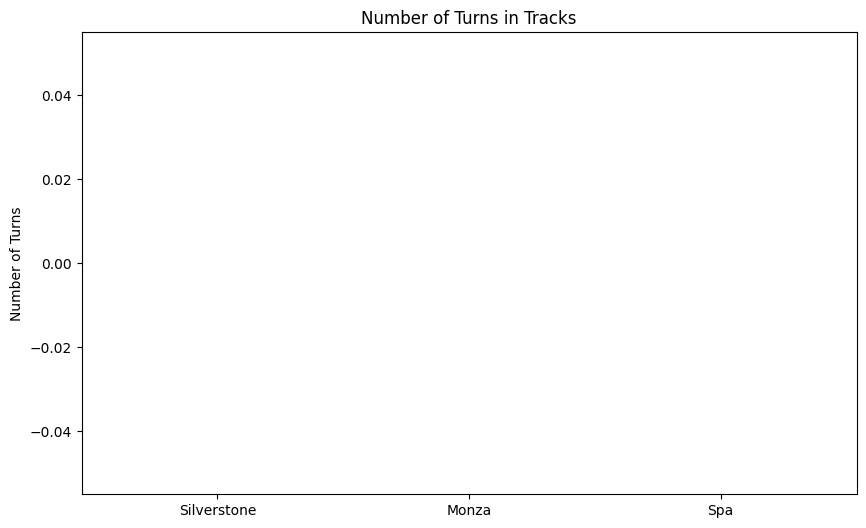

In [2]:
import numpy as np
import pandas as pd
import fastf1

# Load track data (replace with actual track names and years)
track_names = ['Silverstone', 'Monza', 'Spa']  # Add more tracks as needed

# Store turn counts for each track
track_turns = {
    "Track": [],
    "Number of Turns": []
}

def calculate_turns(pos):
    # Get the X and Y coordinates
    x = pos['X'].to_numpy()
    y = pos['Y'].to_numpy()

    # Calculate direction vectors
    vectors = np.array([x[1:] - x[:-1], y[1:] - y[:-1]]).T

    # Calculate angles between consecutive vectors
    angles = []
    for i in range(len(vectors) - 1):
        v1 = vectors[i]
        v2 = vectors[i + 1]

        # Calculate angle between the two vectors
        angle = np.arctan2(v2[1], v2[0]) - np.arctan2(v1[1], v1[0])
        angle = np.degrees(angle)

        # Normalize angle to be within [-180, 180]
        angle = (angle + 180) % 360 - 180
        
        angles.append(angle)

    # Count turns based on an angle threshold (e.g., 30 degrees)
    turn_threshold = 30  # Adjust this threshold as needed
    num_turns = sum(abs(angle) > turn_threshold for angle in angles)

    return num_turns

for track_name in track_names:
    session = fastf1.get_session(2023, track_name, 'Q')
    session.load()
    
    lap = session.laps.pick_fastest()
    pos = lap.get_pos_data()
    
    # Calculate the number of turns for the track
    num_turns = calculate_turns(pos)

    # Append data to the dictionary
    track_turns["Track"].append(track_name)
    track_turns["Number of Turns"].append(num_turns)

# Convert to DataFrame
turns_df = pd.DataFrame(track_turns)

# Display the DataFrame
print(turns_df)

# Visualization: Bar plot of number of turns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(turns_df['Track'], turns_df['Number of Turns'], color='skyblue')
plt.title('Number of Turns in Tracks')
plt.ylabel('Number of Turns')
plt.show()


In [4]:
import numpy as np
import pandas as pd
import fastf1

# Load track data (replace with actual track names and years)
track_names = ['Silverstone', 'Monza', 'Spa']  # Add more tracks as needed

# Store turn counts for each track
track_turns = {
    "Track": [],
    "Number of Turns": []
}

In [11]:
track_name = 'Silverstone'
session = fastf1.get_session(2023, track_name, 'Q')
session.load()

lap = session.laps.pick_fastest()
pos = lap.get_pos_data()

core           INFO 	Loading data for British Grand Prix - Qualifying [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '81', '16', '55', '63', '44', '23', '14', '10', '27', '18', '31', '2', '77', '11', '22', '24', '21', '20']


In [13]:
print(pos[['X','Y']])
x = pos['X'].to_numpy()
y = pos['Y'].to_numpy()

vectors = np.array([x[1:] - x[:-1], y[1:] - y[:-1]]).T

print(vectors)

        X     Y
0   -1739  1233
1   -1695  1291
2   -1520  1513
3   -1389  1679
4   -1289  1813
..    ...   ...
332 -2144   644
333 -2042   814
334 -2000   875
335 -1926   978
336 -1826  1116

[337 rows x 2 columns]
[[  44   58]
 [ 175  222]
 [ 131  166]
 [ 100  134]
 [ 173  238]
 [ 185  255]
 [ 103  141]
 [ 207  287]
 [ 137  202]
 [  82  122]
 [ 109  164]
 [ 110  164]
 [ 144  202]
 [  98  133]
 [ 246  296]
 [ 164  165]
 [ 102   83]
 [ 151   97]
 [  59   29]
 [ 170   65]
 [ 344   59]
 [ 200    5]
 [ 214   -9]
 [ 131  -14]
 [1070   -5]
 [ 141   44]
 [ 179   78]
 [ 197  118]
 [ 243  196]
 [ 189  186]
 [ 175  175]
 [  83   79]
 [ 230  209]
 [ 101   86]
 [  99   81]
 [ 139   98]
 [  79   37]
 [  88   20]
 [  94    2]
 [  66   -9]
 [  73  -22]
 [  71  -37]
 [  70  -57]
 [  56  -66]
 [  42  -80]
 [  21  -57]
 [  20  -73]
 [   8  -44]
 [  18 -167]
 [   8  -84]
 [  13  -81]
 [  33 -110]
 [  34  -67]
 [  59  -80]
 [   9  -10]
 [  67  -61]
 [  45  -31]
 [ 108  -36]
 [  70   12]
 [  61   34]
 [  

In [14]:

angles = []
for i in range(len(vectors) - 1):
    v1 = vectors[i]
    v2 = vectors[i + 1]

    # Calculate angle between the two vectors
    angle = np.arctan2(v2[1], v2[0]) - np.arctan2(v1[1], v1[0])
    angle = np.degrees(angle)

    # Normalize angle to be within [-180, 180]
    angle = (angle + 180) % 360 - 180
    
    angles.append(angle)


In [15]:
angles

[-1.0635922283299237,
 -0.03067174279871665,
 1.5461437598724217,
 0.719770065572817,
 0.05253940227166254,
 -0.1874787039656951,
 0.34680455494793705,
 1.6553715495738004,
 0.23954280764667146,
 0.2969076901054848,
 -0.2416410052215383,
 -1.6329694914736308,
 -0.9003720208040704,
 -3.344977432523166,
 -5.0965199824343586,
 -6.038022779975535,
 -6.420083430338224,
 -6.540754577132901,
 -5.250788236838758,
 -11.192300329279703,
 -8.300105231476806,
 -3.840312625292853,
 -3.6918435191934407,
 5.832324621619449,
 17.598619515998365,
 6.214482206657095,
 7.375600178844053,
 7.968138234095079,
 5.652538745107194,
 0.45835645800042357,
 -1.414423211402152,
 -1.3242894661877358,
 -1.8473862185809935,
 -1.1244942413287902,
 -4.104193534552621,
 -10.088962865255553,
 -12.291984397405429,
 -11.585390830155461,
 -8.984041253556626,
 -9.006057800205099,
 -10.754001925113926,
 -11.630208378868815,
 -10.530465716889552,
 -12.614627352442312,
 -7.474613376886907,
 -4.903349356303295,
 -5.016663606098

core           INFO 	Loading data for British Grand Prix - Qualifying [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '81', '16', '55', '63', '44', '23', '14', '10', '27', '18', '31', '2', '77', '11', '22', '24', '21', '20']
/tmp/ipykernel_83776/73479081.py:53: MatplotlibDeprecationWarning: The get_cmap function was deprecated in M

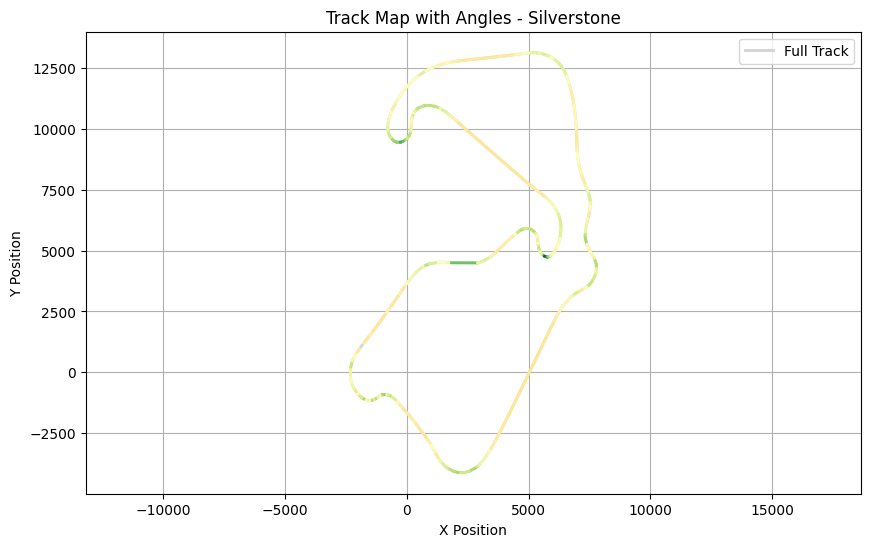

In [50]:
import numpy as np
import fastf1
import matplotlib.pyplot as plt

# Load Silverstone track data
session = fastf1.get_session(2023, 'Silverstone', 'Q')
session.load()

lap = session.laps.pick_fastest()
pos = lap.get_pos_data()

def calculate_turns(pos):
    # Get the X and Y coordinates
    x = pos['X'].to_numpy()
    y = pos['Y'].to_numpy()

    # Calculate direction vectors
    vectors = np.array([x[1:] - x[:-1], y[1:] - y[:-1]]).T

    # Calculate angles between consecutive vectors
    angles = []
    for i in range(len(vectors) - 1):
        v1 = vectors[i]
        v2 = vectors[i + 1]

        # Calculate angle between the two vectors
        angle = np.arctan2(v2[1], v2[0]) - np.arctan2(v1[1], v1[0])
        angle = np.degrees(angle)

        # Normalize angle to be within [-180, 180]
        angle = (angle + 180) % 360 - 180
        
        angles.append(angle)

    return angles, vectors

# Calculate angles and vectors for Silverstone
angles, vectors = calculate_turns(pos)

# Prepare to plot
plt.figure(figsize=(10, 6))

# Plot the full track in a neutral color (e.g., light grey)
plt.plot(pos['X'], pos['Y'], color='lightgrey', linewidth=2, label='Full Track')

import matplotlib.cm as cm  # Import colormap module

# Calculate the min and max angles for normalization
min_angle = min(angles)
max_angle = max(angles)

# Define the colormap (you can choose any other colormap available in matplotlib)
cmap = cm.get_cmap('RdYlGn')  # Red to green colormap

# Define a color mapping based on normalized angles
for i in range(len(vectors) - 1):
    # Get the absolute angle and normalize it
    abs_angle = abs(angles[i])
    normalized_angle = (abs_angle - min_angle) / (max_angle - min_angle)  # Normalize to [0, 1]
    
    # Get the color from the colormap
    color = cmap(normalized_angle)

    # Plot each segment of the track with the specified color
    plt.plot(pos['X'].iloc[i:i+2], pos['Y'].iloc[i:i+2], color=color, linewidth=2)

# Set plot titles and labels
plt.title('Track Map with Angles - Silverstone')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.axis('equal')
plt.grid()
plt.legend()
plt.show()


core           INFO 	Loading data for British Grand Prix - Qualifying [v3.4.1]


req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '81', '16', '55', '63', '44', '23', '14', '10', '27', '18', '31', '2', '77', '11', '22', '24', '21', '20']


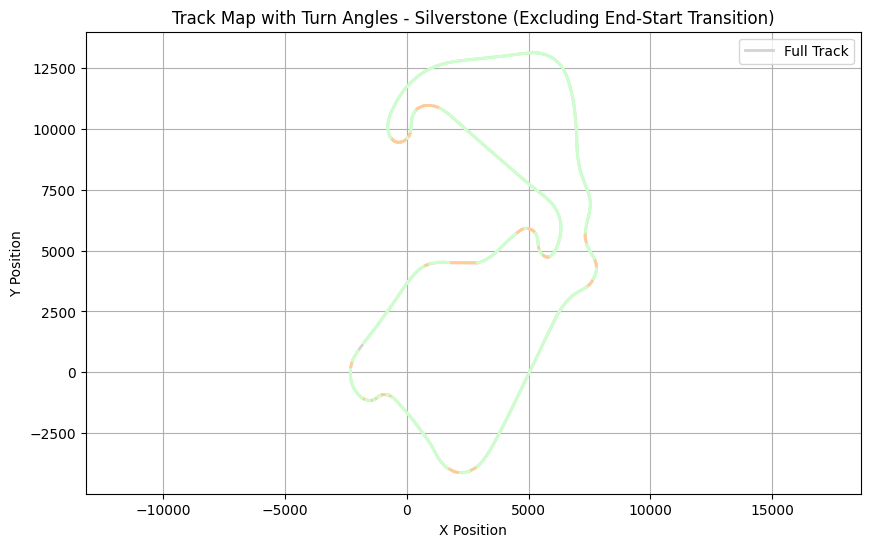

In [51]:
import numpy as np
import fastf1
import matplotlib.pyplot as plt

# Load Silverstone track data
session = fastf1.get_session(2023, 'Silverstone', 'Q')
session.load()

lap = session.laps.pick_fastest()
pos = lap.get_pos_data()

def calculate_turns(pos):
    # Get the X and Y coordinates
    x = pos['X'].to_numpy()
    y = pos['Y'].to_numpy()

    # Calculate direction vectors
    vectors = np.array([x[1:] - x[:-1], y[1:] - y[:-1]]).T

    # Calculate angles between consecutive vectors, excluding last to first transition
    angles = []
    for i in range(len(vectors) - 2):  # Exclude the final transition
        v1 = vectors[i]
        v2 = vectors[i + 1]

        # Calculate angle between the two vectors
        angle = np.arctan2(v2[1], v2[0]) - np.arctan2(v1[1], v1[0])
        angle = np.degrees(angle)

        # Normalize angle to be within [-180, 180]
        angle = (angle + 180) % 360 - 180
        
        angles.append(abs(angle))  # Use absolute value for sharpness only

    return angles, vectors

# Calculate angles and vectors for Silverstone
angles, vectors = calculate_turns(pos)

# Prepare to plot
plt.figure(figsize=(10, 6))

# Plot the full track in a neutral color (e.g., light grey)
plt.plot(pos['X'], pos['Y'], color='lightgrey', linewidth=2, label='Full Track')

# Define a color mapping based on absolute angles (without last to first transition)
for i in range(len(vectors) - 2):  # Stop at second-to-last segment
    abs_angle = angles[i]
    
    # Set color based on angle sharpness
    if abs_angle < 10:      # Small angle
        color = (0.8, 1, 0.8)  # light green
    elif abs_angle < 30:    # Moderate angle
        color = (1, 0.8, 0.6)  # light orange
    elif abs_angle < 60:    # Sharp turn
        color = (1, 0.5, 0.5)  # medium red
    else:                   # Very sharp turn
        color = (1, 0, 0)      # dark red

    # Plot each segment with the chosen color
    plt.plot(pos['X'].iloc[i:i+2], pos['Y'].iloc[i:i+2], color=color, linewidth=2)

# Set plot titles and labels
plt.title('Track Map with Turn Angles - Silverstone (Excluding End-Start Transition)')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.axis('equal')
plt.grid()
plt.legend()
plt.show()


In [29]:
angles

[1.0635922283299237,
 0.03067174279871665,
 1.5461437598724217,
 0.719770065572817,
 0.05253940227166254,
 0.1874787039656951,
 0.34680455494793705,
 1.6553715495738004,
 0.23954280764667146,
 0.2969076901054848,
 0.2416410052215383,
 1.6329694914736308,
 0.9003720208040704,
 3.344977432523166,
 5.0965199824343586,
 6.038022779975535,
 6.420083430338224,
 6.540754577132901,
 5.250788236838758,
 11.192300329279703,
 8.300105231476806,
 3.840312625292853,
 3.6918435191934407,
 5.832324621619449,
 17.598619515998365,
 6.214482206657095,
 7.375600178844053,
 7.968138234095079,
 5.652538745107194,
 0.45835645800042357,
 1.414423211402152,
 1.3242894661877358,
 1.8473862185809935,
 1.1244942413287902,
 4.104193534552621,
 10.088962865255553,
 12.291984397405429,
 11.585390830155461,
 8.984041253556626,
 9.006057800205099,
 10.754001925113926,
 11.630208378868815,
 10.530465716889552,
 12.614627352442312,
 7.474613376886907,
 4.903349356303295,
 5.016663606098774,
 4.153003089480478,
 0.71151

core           INFO 	Loading data for British Grand Prix - Qualifying [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '81', '16', '55', '63', '44', '23', '14', '10', '27', '18', '31', '2', '77', '11', '22', '24', '21', '20']


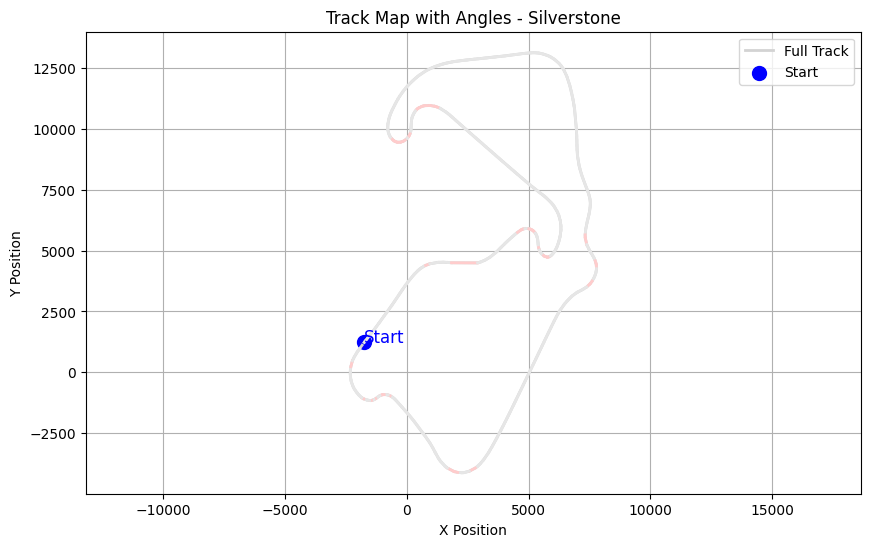

In [30]:
import numpy as np
import fastf1
import matplotlib.pyplot as plt

# Load Silverstone track data
session = fastf1.get_session(2023, 'Silverstone', 'Q')
session.load()

lap = session.laps.pick_fastest()
pos = lap.get_pos_data()


def calculate_turns(pos):
    # Get the X and Y coordinates
    x = pos['X'].to_numpy()
    y = pos['Y'].to_numpy()

    # Calculate direction vectors
    vectors = np.array([x[1:] - x[:-1], y[1:] - y[:-1]]).T

    # Calculate angles between consecutive vectors
    angles = []
    for i in range(len(vectors) - 1):
        v1 = vectors[i]
        v2 = vectors[i + 1]

        # Calculate angle between the two vectors
        angle = np.arctan2(v2[1], v2[0]) - np.arctan2(v1[1], v1[0])
        angle = np.degrees(angle)

        # Normalize angle to be within [-180, 180]
        angle = (angle + 180) % 360 - 180
        
        angles.append(angle)

    return angles, vectors

# Calculate angles and vectors for Silverstone
angles, vectors = calculate_turns(pos)

# Prepare to plot
plt.figure(figsize=(10, 6))

# Plot the full track in a neutral color (e.g., light grey)
plt.plot(pos['X'], pos['Y'], color='lightgrey', linewidth=2, label='Full Track')

# Mark the start of the track with a blue dot and annotation
plt.scatter(pos['X'].iloc[0], pos['Y'].iloc[0], color='blue', s=100, label='Start')
plt.text(pos['X'].iloc[0], pos['Y'].iloc[0], 'Start', color='blue', fontsize=12)

# Define a color mapping based on absolute angles
for i in range(len(vectors) - 1):
    # Get the absolute angle
    abs_angle = abs(angles[i])
    
    # Set a threshold for coloring
    if abs_angle < 10:  # less than 10 degrees
        color = (0.9, 0.9, 0.9)  # light grey for gentle turns
    elif abs_angle < 30:  # between 10 and 30 degrees
        color = (1, 0.8, 0.8)  # light red for moderate turns
    elif abs_angle < 60:  # between 30 and 60 degrees
        color = (1, 0.5, 0.5)  # medium red for sharp turns
    else:  # more than 60 degrees
        color = (1, 0, 0)  # dark red for very sharp turns

    # Plot each segment of the track with the specified color
    plt.plot(pos['X'].iloc[i:i+2], pos['Y'].iloc[i:i+2], color=color, linewidth=2)

# Set plot titles and labels
plt.title('Track Map with Angles - Silverstone')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.axis('equal')
plt.grid()
plt.legend()
plt.show()


In [52]:
# Adjust pandas display settings to show all rows
pd.set_option('display.max_rows', None)

# Display the X and Y columns of the pos DataFrame
print(pos[['X', 'Y']])

        X      Y
0   -1739   1233
1   -1695   1291
2   -1520   1513
3   -1389   1679
4   -1289   1813
5   -1116   2051
6    -931   2306
7    -828   2447
8    -621   2734
9    -484   2936
10   -402   3058
11   -293   3222
12   -183   3386
13    -39   3588
14     59   3721
15    305   4017
16    469   4182
17    571   4265
18    722   4362
19    781   4391
20    951   4456
21   1295   4515
22   1495   4520
23   1709   4511
24   1840   4497
25   2910   4492
26   3051   4536
27   3230   4614
28   3427   4732
29   3670   4928
30   3859   5114
31   4034   5289
32   4117   5368
33   4347   5577
34   4448   5663
35   4547   5744
36   4686   5842
37   4765   5879
38   4853   5899
39   4947   5901
40   5013   5892
41   5086   5870
42   5157   5833
43   5227   5776
44   5283   5710
45   5325   5630
46   5346   5573
47   5366   5500
48   5374   5456
49   5392   5289
50   5400   5205
51   5413   5124
52   5446   5014
53   5480   4947
54   5539   4867
55   5548   4857
56   5615   4796
57   5660   47

core           INFO 	Loading data for British Grand Prix - Qualifying [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '81', '16', '55', '63', '44', '23', '14', '10', '27', '18', '31', '2', '77', '11', '22', '24', '21', '20']


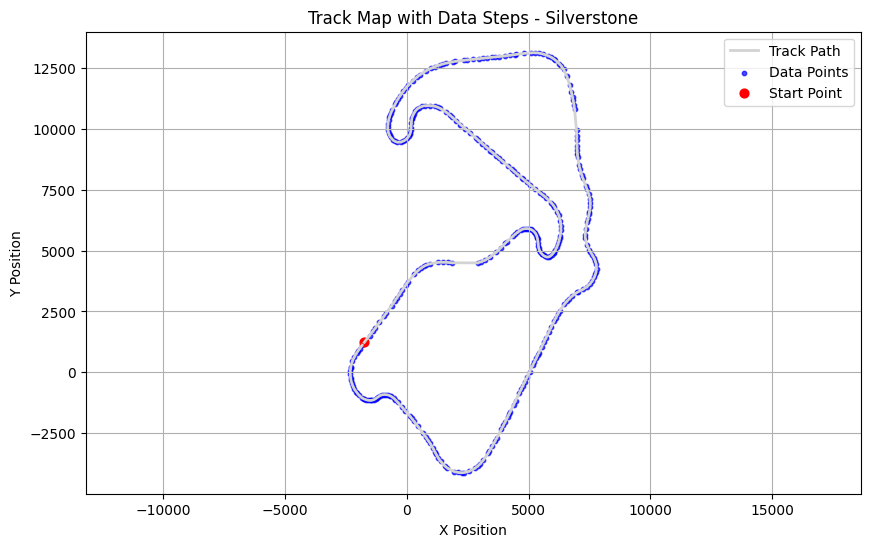

In [45]:
import matplotlib.pyplot as plt
import fastf1
import numpy as np

# Load Silverstone track data
session = fastf1.get_session(2023, 'Silverstone', 'Q')
session.load()

lap = session.laps.pick_fastest()
pos = lap.get_pos_data()

# Prepare to plot
plt.figure(figsize=(10, 6))

# Plot the full track in a base color (e.g., grey)
plt.plot(pos['X'], pos['Y'], color='lightgrey', linewidth=2, label='Track Path')

# Plot each point on the track with a marker to visualize each data step
plt.scatter(pos['X'], pos['Y'], color='blue', s=10, label='Data Points', alpha=0.7)

# Optional: Mark the beginning of the track with a distinct color
plt.scatter(pos['X'].iloc[0], pos['Y'].iloc[0], color='red', s=40, label='Start Point')

# Set plot titles and labels
plt.title('Track Map with Data Steps - Silverstone')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.axis('equal')
plt.legend()
plt.grid()
plt.show()



In [46]:
pos

,Date,Status,X,Y,Z,Source,Time,SessionTime
0,2023-07-08 15:14:14.724,OnTrack,-1739,1233,1963,pos,0 days 00:00:00.005000,0 days 01:29:14.721000
1,2023-07-08 15:14:14.805,OnTrack,-1695,1291,1964,pos,0 days 00:00:00.086000,0 days 01:29:14.802000
2,2023-07-08 15:14:15.164,OnTrack,-1520,1513,1965,pos,0 days 00:00:00.445000,0 days 01:29:15.161000
3,2023-07-08 15:14:15.484,OnTrack,-1389,1679,1967,pos,0 days 00:00:00.765000,0 days 01:29:15.481000
4,2023-07-08 15:14:15.705,OnTrack,-1289,1813,1969,pos,0 days 00:00:00.986000,0 days 01:29:15.702000
...,...,...,...,...,...,...,...,...
332,2023-07-08 15:15:40.464,OnTrack,-2144,644,1962,pos,0 days 00:01:25.745000,0 days 01:30:40.461000
333,2023-07-08 15:15:40.744,OnTrack,-2042,814,1962,pos,0 days 00:01:26.025000,0 days 01:30:40.741000
334,2023-07-08 15:15:40.825,OnTrack,-2000,875,1962,pos,0 days 00:01:26.106000,0 days 01:30:40.822000
335,2023-07-08 15:15:41.024,OnTrack,-1926,978,1962,pos,0 days 00:01:26.305000,0 days 01:30:41.021000


core           INFO 	Loading data for British Grand Prix - Qualifying [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '81', '16', '55', '63', '44', '23', '14', '10', '27', '18', '31', '2', '77', '11', '22', '24', '21', '20']


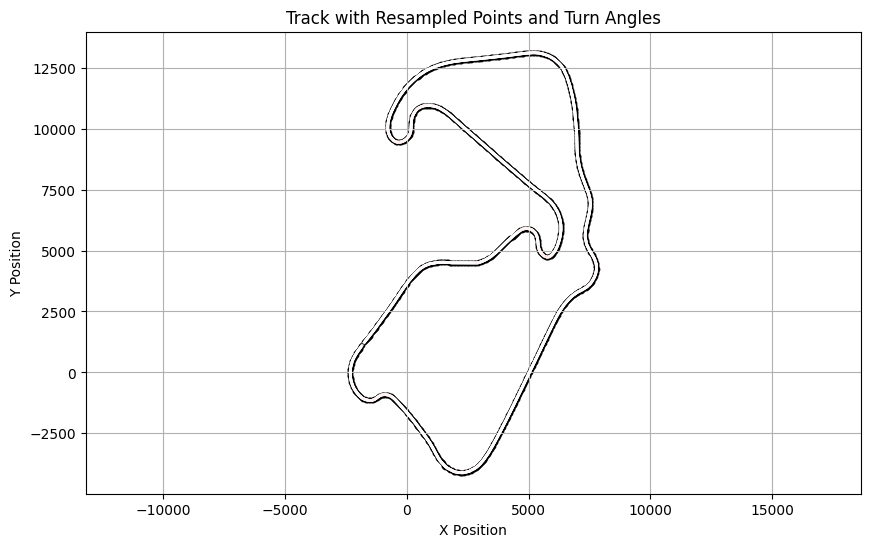

In [48]:
import numpy as np
import fastf1
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Load the Silverstone track data
session = fastf1.get_session(2023, 'Silverstone', 'Q')
session.load()
lap = session.laps.pick_fastest()
pos = lap.get_pos_data()

# Get the X and Y coordinates
x = pos['X'].to_numpy()
y = pos['Y'].to_numpy()

# Calculate cumulative distances to use for resampling
distances = np.cumsum(np.sqrt(np.diff(x)**2 + np.diff(y)**2))
distances = np.insert(distances, 0, 0)  # Start from zero for cumulative distances

# Define the new, uniform distance points
uniform_distances = np.linspace(0, distances[-1], num=1000)  # 1000 points for smoothness

# Interpolate X and Y coordinates along the uniform distances
interp_func_x = interp1d(distances, x, kind='linear')
interp_func_y = interp1d(distances, y, kind='linear')
uniform_x = interp_func_x(uniform_distances)
uniform_y = interp_func_y(uniform_distances)

# Recalculate angles based on uniform data points
vectors = np.array([uniform_x[1:] - uniform_x[:-1], uniform_y[1:] - uniform_y[:-1]]).T
angles = []
for i in range(len(vectors) - 1):
    v1 = vectors[i]
    v2 = vectors[i + 1]
    angle = np.arctan2(v2[1], v2[0]) - np.arctan2(v1[1], v1[0])
    angle = np.degrees(angle)
    angle = (angle + 180) % 360 - 180
    angles.append(abs(angle))  # Absolute angle for color intensity

# Plot the track and color-code based on calculated angles
plt.figure(figsize=(10, 6))
plt.plot(uniform_x, uniform_y, color='lightgrey', linewidth=2, label='Full Track')

# Use the angles to color the track, making sure we stay within bounds
for i in range(len(angles)):
    angle_intensity = abs(angles[i]) / 180  # Normalize for color intensity
    color = (1, 1 - angle_intensity, 1 - angle_intensity)  # Red intensity based on angle
    plt.plot(uniform_x[i:i+2], uniform_y[i:i+2], color=color, linewidth=2)

# Plot markers for each point along the track
plt.scatter(uniform_x, uniform_y, color='black', s=10)

plt.title('Track with Resampled Points and Turn Angles')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.axis('equal')
plt.grid()

core           INFO 	Loading data for British Grand Prix - Qualifying [v3.4.1]
req            INFO 	Using cached data for session_info


req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '81', '16', '55', '63', '44', '23', '14', '10', '27', '18', '31', '2', '77', '11', '22', '24', '21', '20']


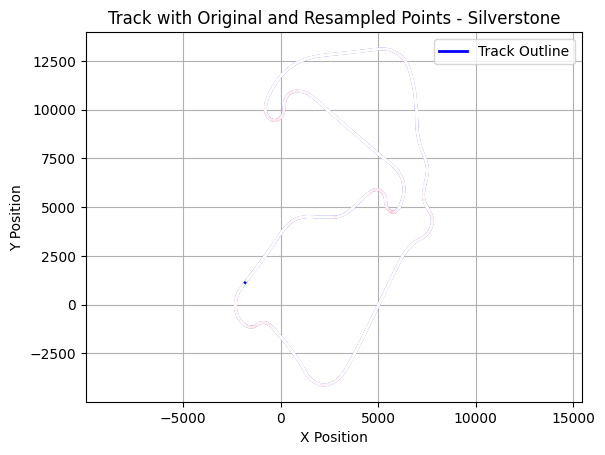

In [56]:
import numpy as np
import fastf1
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Load Silverstone track data
session = fastf1.get_session(2023, 'Silverstone', 'Q')
session.load()

lap = session.laps.pick_fastest()
pos = lap.get_pos_data()

# Get X and Y coordinates
x = pos['X'].to_numpy()
y = pos['Y'].to_numpy()

# Define distances along the track for interpolation
distances = np.sqrt(np.diff(x)**2 + np.diff(y)**2).cumsum()
distances = np.insert(distances, 0, 0)  # Add 0 for the starting point

# Interpolate uniformly along the distances
uniform_distances = np.linspace(0, distances[-1], 500)  # Resample to 500 points
interp_x = interp1d(distances, x, kind='linear')
interp_y = interp1d(distances, y, kind='linear')
uniform_x = interp_x(uniform_distances)
uniform_y = interp_y(uniform_distances)

# Calculate angles between consecutive segments of the interpolated points
angles = []
for i in range(len(uniform_x) - 2):
    v1 = np.array([uniform_x[i+1] - uniform_x[i], uniform_y[i+1] - uniform_y[i]])
    v2 = np.array([uniform_x[i+2] - uniform_x[i+1], uniform_y[i+2] - uniform_y[i+1]])
    angle = np.arctan2(v2[1], v2[0]) - np.arctan2(v1[1], v1[0])
    angle = np.degrees(angle)
    angles.append((angle + 180) % 360 - 180)

# Plot the full track in a neutral color
plt.plot(uniform_x, uniform_y, color='blue', linewidth=2, label='Track Outline')

# Color the track based on angles
for i in range(len(angles)):
    angle_intensity = abs(angles[i]) / 180  # Normalize for color intensity
    color = (1, 1 - angle_intensity, 1 - angle_intensity)  # Red intensity based on angle
    plt.plot(uniform_x[i:i+2], uniform_y[i:i+2], color=color, linewidth=2)

# Mark original and resampled points
# plt.scatter(x, y, color='blue', s=10, label='Original Points')  # Original data points
# plt.scatter(uniform_x, uniform_y, color='orange', s=5, label='Resampled Points')  # Resampled points

plt.title('Track with Original and Resampled Points - Silverstone')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.axis('equal')
plt.grid()
plt.legend()
plt.show()


In [54]:
# uniform_x, uniform_y,
len(angles)

498

In [54]:
import numpy as np
import fastf1
import matplotlib.pyplot as plt

# Load Silverstone track data
session = fastf1.get_session(2023, 'Silverstone', 'Q')
session.load()

lap = session.laps.pick_fastest()
pos = lap.get_pos_data()


def calculate_turns(pos):
    # Get the X and Y coordinates
    x = pos['X'].to_numpy()
    y = pos['Y'].to_numpy()

    # Calculate direction vectors
    vectors = np.array([x[1:] - x[:-1], y[1:] - y[:-1]]).T

# Calculate angles between consecutive vectors
angles = []
for i in range(len(vectors) - 1):
    v1 = vectors[i]
    v2 = vectors[i + 1]

    # Calculate angle between the two vectors
    angle = np.arctan2(v2[1], v2[0]) - np.arctan2(v1[1], v1[0])
    print(angle)
    angle = np.degrees(angle)
    print(abs(angle))


core           INFO 	Loading data for British Grand Prix - Qualifying [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '81', '16', '55', '63', '44', '23', '14', '10', '27', '18', '31', '2', '77', '11', '22', '24', '21', '20']


-0.018563186282980704
1.0635922283299366
-0.0005353228991626935
0.03067174279872969
0.02698529931893845
1.546143759872428
0.01256235750154111
0.7197700655728152
0.0009169855566704133
0.052539402271669054
-0.003272120661572897
0.18747870396568178
0.006052881344755123
0.34680455494793877
0.028891683883903285
1.6553715495737966
0.004180810692905879
0.23954280764667216
0.00518201676683161
0.2969076901054796
-0.004217431148944462
0.24164100522152732
-0.028500694210832234
1.6329694914736255
-0.01571445625586576
0.9003720208040618
-0.0583808696024356
3.3449774325231605
-0.08895105408716308
5.096519982434356
-0.10538337782099416
6.038022779975531
-0.11205159411213417
6.420083430338233
-0.11415770293585853
6.540754577132901
-0.09164354305782424
5.250788236838764
-0.19534249161797643
11.192300329279709
-0.14486416455127646
8.300105231476811
-0.06702609961726776
3.840312625292865
-0.06443482487833996
3.6918435191934376
0.1017932676923918
5.832324621619447
0.30715385435990217
17.598619515998355
0.

In [65]:
np.degrees(np.arctan2(1,1)) - np.degrees(np.arctan2(2,0))

-45.0

In [4]:
test = [[0,3],
        [1,2],
        [3,2],
        [4,0],
        [3,-2],
        [1,-3],
        [0,-1],
        [-2,-2],
        [-3,0],
        [-2,2],
        [0,3]]
        

In [5]:
np.array(test)[:,0]

array([ 0,  1,  3,  4,  3,  1,  0, -2, -3, -2,  0])

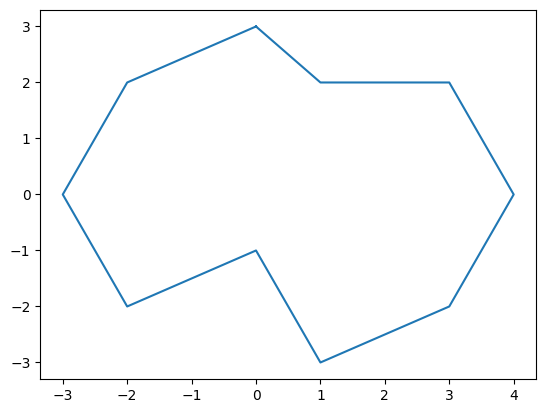

In [6]:
plt.plot(np.array(test)[:,0],np.array(test)[:,1])

In [7]:
X = np.array(test)[:,0]
Y = np.array(test)[:,1]

In [8]:
print(X[1:])
print(X[:-1])

[ 1  3  4  3  1  0 -2 -3 -2  0]
[ 0  1  3  4  3  1  0 -2 -3 -2]


In [13]:
calcul = np.array([X[1:] - X[:-1], Y[1:] - Y[:-1]]).T
print(calcul)

[[ 1 -1]
 [ 2  0]
 [ 1 -2]
 [-1 -2]
 [-2 -1]
 [-1  2]
 [-2 -1]
 [-1  2]
 [ 1  2]
 [ 2  1]]


In [22]:
# Calculate angles between consecutive vectors, excluding last to first transition
angles = []
for i in range(len(calcul) - 2):  # Exclude the final transition
    v1 = calcul[i]
    v2 = calcul[i + 1]

    # Calculate angle between the two vectors
    print(v2[1], v2[0])
    print("arctanV2")
    print(np.degrees(np.arctan2(v2[1], v2[0])))
    print(v1[1], v1[0])
    print("arctanV1")
    print(np.degrees(np.arctan2(v1[1], v1[0])))
   
    angle = np.arctan2(v2[1], v2[0]) - np.arctan2(v1[1], v1[0])
    angle = round(np.degrees(angle))

    # Normalize angle to be within [-180, 180]
    # angle = (angle + 180) % 360 - 180
    
    angles.append(abs(angle))  # Use absolute value for sharpness only

angles

0 2
arctanV2
0.0
-1 1
arctanV1
-45.0
-2 1
arctanV2
-63.43494882292201
0 2
arctanV1
0.0
-2 -1
arctanV2
-116.56505117707799
-2 1
arctanV1
-63.43494882292201
-1 -2
arctanV2
-153.434948822922
-2 -1
arctanV1
-116.56505117707799
2 -1
arctanV2
116.56505117707799
-1 -2
arctanV1
-153.434948822922
-1 -2
arctanV2
-153.434948822922
2 -1
arctanV1
116.56505117707799
2 -1
arctanV2
116.56505117707799
-1 -2
arctanV1
-153.434948822922
2 1
arctanV2
63.43494882292201
2 -1
arctanV1
116.56505117707799


[45, 63, 53, 37, 270, 270, 270, 53]

In [32]:
def angle_at_vertex(v1, v2):
    """
    Calcule l'angle externe entre deux vecteurs formant un sommet (sans les recouper).
    v1 est le vecteur entrant, et v2 est le vecteur sortant du sommet.
    """
    # Inverser la direction de v2 pour simuler l'angle au sommet
    v2_opposite = -v2
    # Calcul du produit scalaire avec le vecteur inversé
    dot_product = np.dot(v1, v2_opposite)
    # Normes des vecteurs
    norm_v1 = np.linalg.norm(v1)
    norm_v2_opposite = np.linalg.norm(v2_opposite)
    # Calcul de l'angle en radians, puis conversion en degrés
    angle_rad = np.arccos(dot_product / (norm_v1 * norm_v2_opposite))
    angle_deg = np.degrees(angle_rad)
    return angle_deg

def angles_at_vertices(vectors):
    """
    Calcule l'angle au sommet formé par chaque paire consécutive de vecteurs.
    """
    angles = []
    n = len(vectors)
    for i in range(n):
        v1 = vectors[i]
        v2 = vectors[(i + 1) % n]
        angle = angle_at_vertex(v1, v2)
        angles.append(angle)
    return angles

# Calcul des angles au sommet
angles_vertex = angles_at_vertices(vectors)
angles_vertex


[135.0,
 116.56505117707799,
 126.86989764584402,
 143.13010235415595,
 90.0,
 90.0,
 90.0,
 126.86989764584402,
 143.13010235415595,
 108.43494882292202]

core           INFO 	Loading data for British Grand Prix - Qualifying [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '81', '16', '55', '63', '44', '23', '14', '10', '27', '18', '31', '2', '77', '11', '22', '24', '21', '20']


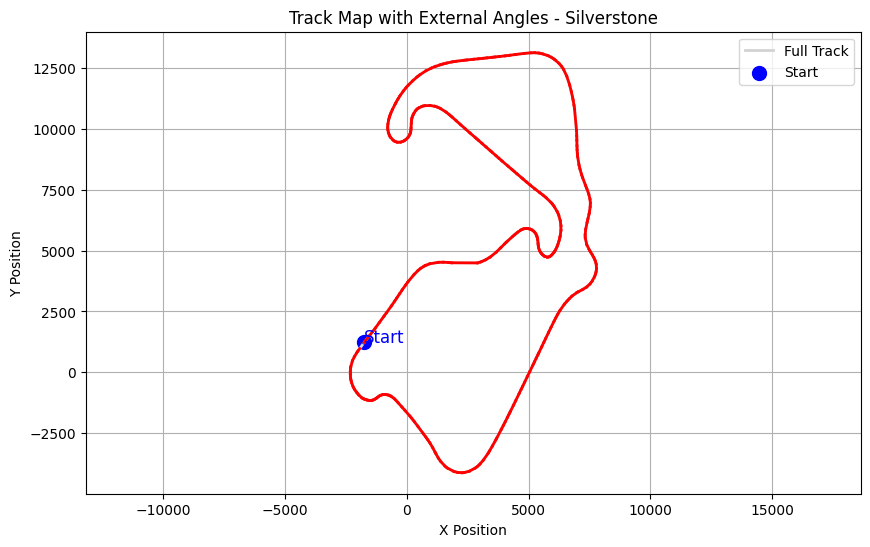

In [42]:
import numpy as np
import fastf1
import matplotlib.pyplot as plt

# Charger les données de la piste de Silverstone
session = fastf1.get_session(2023, 'Silverstone', 'Q')
session.load()

lap = session.laps.pick_fastest()
pos = lap.get_pos_data()

# Fonction pour calculer l'angle externe entre deux vecteurs formant un sommet
def angle_at_vertex(v1, v2):
    v2_opposite = -v2  # Inverser la direction de v2
    dot_product = np.dot(v1, v2_opposite)
    norm_v1 = np.linalg.norm(v1)
    norm_v2_opposite = np.linalg.norm(v2_opposite)
    angle_rad = np.arccos(dot_product / (norm_v1 * norm_v2_opposite))
    angle_deg = np.degrees(angle_rad)
    return angle_deg

# Fonction pour calculer les angles au sommet pour tous les vecteurs consécutifs
def angles_at_vertices(vectors):
    angles = []
    n = len(vectors)
    for i in range(n - 1):
        v1 = vectors[i]
        v2 = vectors[i + 1]
        angle = angle_at_vertex(v1, v2)
        angles.append(angle)
    return angles

# Calcul des vecteurs et des angles
x = pos['X'].to_numpy()
y = pos['Y'].to_numpy()
vectors = np.array([x[1:] - x[:-1], y[1:] - y[:-1]]).T
angles = angles_at_vertices(vectors)

# Préparer l'affichage
plt.figure(figsize=(10, 6))
plt.plot(pos['X'], pos['Y'], color='lightgrey', linewidth=2, label='Full Track')
plt.scatter(pos['X'].iloc[0], pos['Y'].iloc[0], color='blue', s=100, label='Start')
plt.text(pos['X'].iloc[0], pos['Y'].iloc[0], 'Start', color='blue', fontsize=12)

# Mapper les couleurs en fonction des angles
for i in range(len(vectors) - 1):
    abs_angle = angles[i]
    if abs_angle < 10:
        color = (0.9, 0.9, 0.9)
    elif abs_angle < 30:
        color = (1, 0.8, 0.8)
    elif abs_angle < 60:
        color = (1, 0.5, 0.5)
    else:
        color = (1, 0, 0)
    
    plt.plot(pos['X'].iloc[i:i+2], pos['Y'].iloc[i:i+2], color=color, linewidth=2)

# Configurer les titres et les étiquettes de l'axe
plt.title('Track Map with External Angles - Silverstone')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.axis('equal')
plt.grid()
plt.legend()
plt.show()


core           INFO 	Loading data for British Grand Prix - Qualifying [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '81', '16', '55', '63', '44', '23', '14', '10', '27', '18', '31', '2', '77', '11', '22', '24', '21', '20']


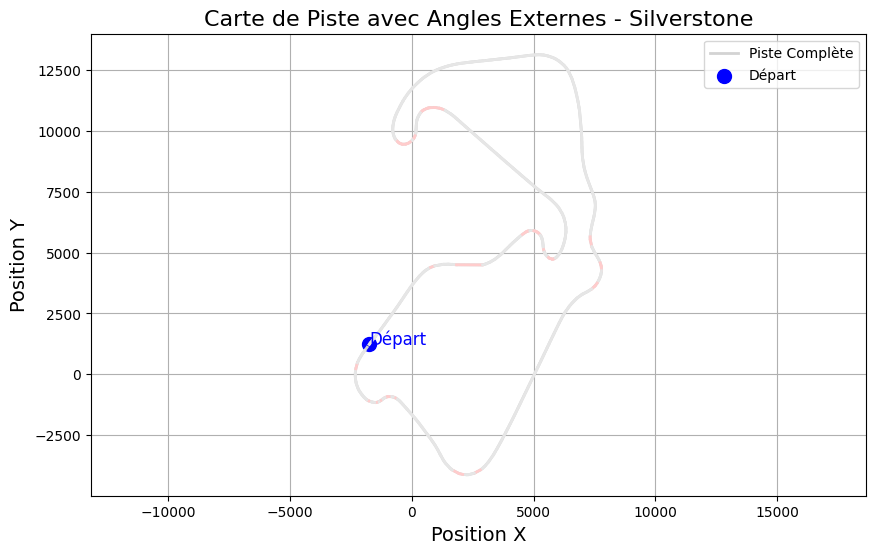

In [45]:
import numpy as np
import fastf1
import matplotlib.pyplot as plt

# Charger les données de la piste de Silverstone
session = fastf1.get_session(2023, 'Silverstone', 'Q')
session.load()

lap = session.laps.pick_fastest()
pos = lap.get_pos_data()

# Fonction pour calculer l'angle externe entre deux vecteurs formant un sommet
def angle_at_vertex(v1, v2):
    v2_opposite = -v2  # Inverser la direction de v2
    dot_product = np.dot(v1, v2_opposite)
    norm_v1 = np.linalg.norm(v1)
    norm_v2_opposite = np.linalg.norm(v2_opposite)
    angle_rad = np.arccos(dot_product / (norm_v1 * norm_v2_opposite))
    angle_deg = np.degrees(angle_rad)
    return angle_deg

# Fonction pour calculer les angles au sommet pour tous les vecteurs consécutifs
def angles_at_vertices(vectors):
    angles = []
    n = len(vectors)
    for i in range(n - 1):
        v1 = vectors[i]
        v2 = vectors[i + 1]
        angle = angle_at_vertex(v1, v2)
        angles.append(angle)
    return angles

# Calcul des vecteurs et des angles
x = pos['X'].to_numpy()
y = pos['Y'].to_numpy()
vectors = np.array([x[1:] - x[:-1], y[1:] - y[:-1]]).T
angles = angles_at_vertices(vectors)

# Préparer l'affichage
plt.figure(figsize=(10, 6))
plt.plot(pos['X'], pos['Y'], color='lightgrey', linewidth=2, label='Piste Complète')
plt.scatter(pos['X'].iloc[0], pos['Y'].iloc[0], color='blue', s=100, label='Départ')
plt.text(pos['X'].iloc[0], pos['Y'].iloc[0], 'Départ', color='blue', fontsize=12)

# Mapper les couleurs en fonction des angles (proches de 180 degrés)
for i in range(len(vectors) - 1):
    abs_angle = angles[i]
    # Inverser les angles pour se concentrer sur les angles proches de 180
    adjusted_angle = 180 - abs_angle
    
    if adjusted_angle < 10:
        color = (0.9, 0.9, 0.9)  # Couleur très légère pour des angles proches de 180
    elif adjusted_angle < 30:
        color = (1, 0.8, 0.8)    # Couleur légèrement rouge
    elif adjusted_angle < 60:
        color = (1, 0.5, 0.5)    # Couleur rouge plus prononcée
    else:
        color = (1, 0, 0)        # Couleur rouge vif pour les angles plus éloignés de 180
    
    plt.plot(pos['X'].iloc[i:i+2], pos['Y'].iloc[i:i+2], color=color, linewidth=2)

# Configurer les titres et les étiquettes de l'axe
plt.title('Carte de Piste avec Angles Externes - Silverstone', fontsize=16)
plt.xlabel('Position X', fontsize=14)
plt.ylabel('Position Y', fontsize=14)
plt.axis('equal')
plt.grid()
plt.legend()
plt.show()
